In [2]:
import numpy as np

In [3]:
data= np.genfromtxt('../data/advertising.csv', delimiter= ',', skip_header= 1)



In [ ]:
X= data[:, :3]
y= data[:, 3:]
X.shape
X_T =X.T
X_T.shape



In [ ]:
n_features, n_samples = X.shape
print(f"n_features: {n_features}, n_samples: {n_samples}")

In [ ]:
X_b= np.vstack([np.ones((1, n_features)), X_T])

In [ ]:
X_b.shape

In [ ]:
theta = np.random.randn(n_samples + 1, 1)
theta.shape

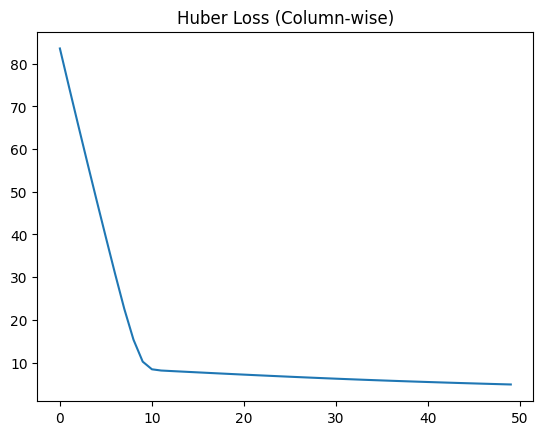

In [8]:
import numpy as np
import matplotlib.pyplot as plt
data= np.genfromtxt('../data/advertising.csv', delimiter= ',', skip_header= 1)
X= data[:, :3]
y= data[:, 3:]
X.shape
X_T =X.T
X_T.shape
n_features, n_samples = X.shape
X_b= np.vstack([np.ones((1, n_features)), X_T])
theta = np.random.randn(n_samples + 1, 1)

n_epochs = 50
lr = 0.0005
losses = []
delta = 0.9

eps = 1e-10

for epoch in range(n_epochs):
    # === forward ===
    y_hat = theta.T @ X_b             # (1,n)
    residual = (y - y_hat.T)          # (n,1)
    abs_r = np.abs(residual)          # (n,1)

    # === huber loss per-sample ===
    loss_i = np.where(abs_r <= delta,
                      0.5 * residual**2,                  # MSE part
                      delta * (abs_r - 0.5 * delta))      # MAE part
    huber_loss = np.mean(loss_i)                          # average loss
    losses.append(huber_loss)

    # === gradient ===
    k = np.where(abs_r <= delta, residual, delta * residual / (abs_r + eps))  # (n,1)

    # column-wise (X_b: 4,n) → gradient (4,1)
    gradient = -(X_b @ k) / len(y)       # accumulate theo cột (column-wise)
    theta = theta - lr * gradient

plt.plot(losses)
plt.title("Huber Loss (Column-wise)")
plt.show()
